
### Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred. Records in the new system begin in June of 2015.

### Code to extract dataset that is Publicly available.


In [196]:
# Python 3.x
from bs4 import BeautifulSoup
from urllib.request import urlopen, urlretrieve, quote
from urllib.parse import urljoin
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [234]:
# Connect to the URL to download the csv file
url = 'https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b?view_id=c936ae1f-02ed-4b4e-946d-b225d08cb345'
u = urlopen(url)
try:
    html = u.read().decode('utf-8')
finally:
    u.close()

soup = BeautifulSoup(html, "html.parser")

# Select all A elements with href attributes containing URLs starting with https://
for link in soup.select('a[href^="https://"]'):
    href = link.get('href')

    # Check and download if it has the correct extension
    if any(href.endswith(x) for x in ['.csv']):
        # filename = href.rsplit('/', 1)[-1]
        filename = "BostonCrimeData.csv"
        print("Downloading %s to %s..." % (href, filename) )
        urlretrieve(href, filename)
        print("Done.")
        break

Done.


In [239]:
#Import BostonCrimeData.csv into a Pandas DataFrame
BostonCrimeData_DF = pd.read_csv("BostonCrimeData.csv")
BostonCrimeData_DF.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,NaN,NaN,"(0.00000000, 0.00000000)"
2,I92094519,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,0,2019-11-22 07:50:00,2019,11,Friday,7,NaN,BROOKS ST,NaN,NaN,"(0.00000000, 0.00000000)"
3,I92089785,3005,NaN,SICK ASSIST,E13,574,0,2019-11-05 18:00:00,2019,11,Tuesday,18,NaN,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
4,I90583827,1402,NaN,VANDALISM,E18,498,0,2019-11-02 05:09:00,2019,11,Saturday,5,NaN,BRADLEE ST,NaN,NaN,"(0.00000000, 0.00000000)"
5,I19209887,3807,NaN,M/V ACCIDENT - OTHER CITY VEHICLE,E13,574,0,2019-12-08 18:45:00,2019,12,Sunday,18,NaN,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
6,I19209662,615,NaN,LARCENY THEFT OF MV PARTS & ACCESSORIES,E13,574,0,2019-11-29 15:00:00,2019,11,Friday,15,NaN,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
7,I192082859,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)"
8,I192082751,724,Auto Theft,AUTO THEFT,E18,493,NaN,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)"
9,I192082680,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,NaN,2019-10-12 15:12:43,2019,10,Saturday,15,Part One,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)"


### Cleaning the Data

##### Subsetting the required columns from the loaded dataset to a new dataframe.

In [260]:
#Clean the BostonCrimeData DF by retrieving the required columns 
BostonCrimeDataCleaned = BostonCrimeData_DF[['OFFENSE_CODE', 'OFFENSE_DESCRIPTION', 'DISTRICT','REPORTING_AREA','STREET', 'SHOOTING', 'YEAR', 'MONTH' , 'DAY_OF_WEEK']]


#Checking if there are any missing values in the columns
print( BostonCrimeDataCleaned.isna().any() , 
       BostonCrimeDataCleaned.isna().sum() ,
BostonCrimeDataCleaned.columns[BostonCrimeDataCleaned.isna().any()].tolist())



OFFENSE_CODE           False
OFFENSE_DESCRIPTION    False
DISTRICT                True
REPORTING_AREA         False
STREET                  True
SHOOTING                True
YEAR                   False
MONTH                  False
DAY_OF_WEEK            False
dtype: bool OFFENSE_CODE                0
OFFENSE_DESCRIPTION         0
DISTRICT                 2282
REPORTING_AREA              0
STREET                  14356
SHOOTING               425093
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
dtype: int64 ['DISTRICT', 'STREET', 'SHOOTING']


##### Check the data to calculate some basic statistics for required columns in the dataframe. 


In [236]:
BostonCrimeDataCleaned.describe(include='O')

,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,STREET,SHOOTING
count,444003,441742,444003,429853,18910
unique,283,13,880,5033,3
top,SICK/INJURED/MEDICAL - PERSON,B2,,WASHINGTON ST,0
freq,26959,70665,29341,20750,17015


### Data Visualization and Analysis

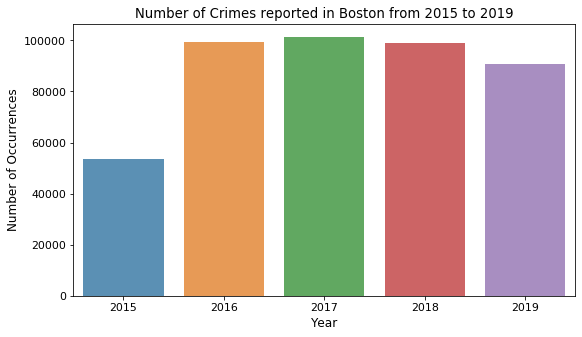

In [245]:
CrimeCountbyYear  = BostonCrimeDataCleaned['YEAR'].value_counts()
plt.figure(figsize=(9,5))
sns.barplot(CrimeCount.index, CrimeCount.values, alpha=0.8)
plt.title('Number of Crimes reported in Boston from 2015 to 2019')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.show()

##### The number of crimes are highest in the year 2017 immediately followed by 2016 and 2018 very closely and lowest in 2015. However, they seemigly reduced in 2019. The lowest in 2015 can be due to the fact that the data collected is only from June of 2015.  

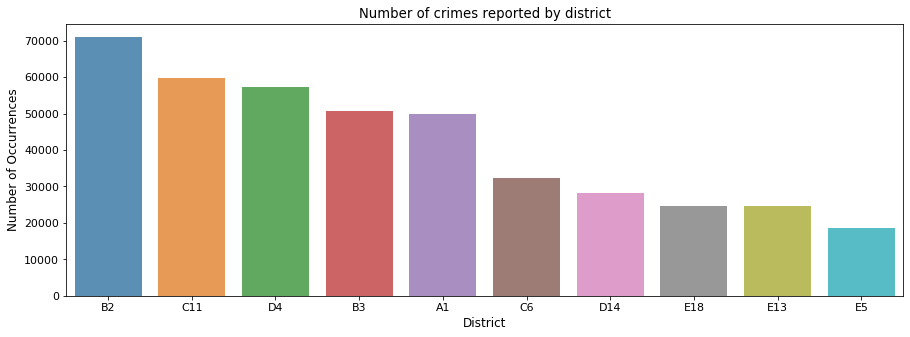

In [254]:
CrimeCountbyDistrict  = BostonCrimeDataCleaned['DISTRICT'].value_counts().nlargest(10)
plt.figure(figsize=(15,5))
graph = sns.barplot(CrimeCountbyDistrict.index, CrimeCountbyDistrict.values, alpha=0.8)
plt.title('Number of crimes reported by district')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('District', fontsize=12)
plt.show()



##### District B2 had the most number of crimes reported over the years which is 70665. 

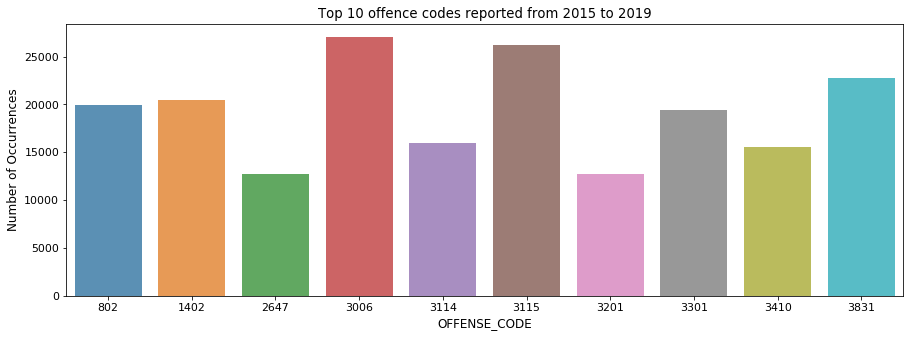

In [252]:
OffenseCodeCountbyOffense  = BostonCrimeDataCleaned['OFFENSE_CODE'].value_counts().nlargest(10)
plt.figure(figsize=(15,5))
sns.barplot(OffenseCodeCountbyOffense.index, OffenseCodeCountbyOffense.values, alpha=0.8)
plt.title('Top 10 offence codes reported from 2015 to 2019')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('OFFENSE_CODE', fontsize=12)
plt.show()

In [264]:
BostonCrimeDataCleaned[(BostonCrimeDataCleaned['OFFENSE_CODE'] == 3006) |(BostonCrimeDataCleaned['OFFENSE_CODE'] == 3115 )]

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,STREET,SHOOTING,YEAR,MONTH,DAY_OF_WEEK
1,3115,INVESTIGATE PERSON,C11,355,GIBSON ST,0,2019,10,Wednesday
13,3115,INVESTIGATE PERSON,A1,,NASHUA ST,NaN,2019,9,Sunday
17,3115,INVESTIGATE PERSON,A7,28,PARIS ST,NaN,2019,9,Sunday
25,3115,INVESTIGATE PERSON,B2,328,MAGNOLIA ST,NaN,2019,9,Sunday
30,3006,SICK/INJURED/MEDICAL - PERSON,A1,111,TREMONT ST,NaN,2019,9,Sunday
...,...,...,...,...,...,...,...,...,...
446076,3115,INVESTIGATE PERSON,B2,,NaN,0,2019,9,Sunday
446108,3115,INVESTIGATE PERSON,NaN,,LOGAN WAY,1,2019,12,Tuesday
446129,3115,INVESTIGATE PERSON,B2,290,ROXBURY ST,0,2019,10,Wednesday
446147,3115,INVESTIGATE PERSON,B2,330,COLUMBIA ROAD,0,2019,12,Thursday


##### The top most type of crime reported is of offense code 3006 and 3115 that corresponds to the description : SICK/INJURED/MEDICAL - PERSON and INVESTIGATE PERSON. Both these crimes are commonly occuring events and are not much of severity. They do not include any kind of shooting. 	 